### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.simplefilter("ignore")

In [2]:
# Loading the dataset
data = pd.read_csv("language_detection.csv")

In [3]:
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the physica...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4]\nThe concept of nature as a whole, the ...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [4]:
# value count for each language
data["Language"].value_counts()

Language
English       1463
French        1061
Spanish        860
Portugeese     786
Italian        711
Russian        694
Sweedish       685
Dutch          614
Malayalam      600
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         430
Kannada        369
Greek          367
Hindi           63
Name: count, dtype: int64

In [5]:
# separating the independent and dependant features
X = data["Text"]
y = data["Language"]

In [6]:
# converting categorical variables to numerical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### Text preprocessing

In [7]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

### Bag of Words

In [8]:
# creating bag of words using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [9]:
X.shape

(10652, 40638)

### Train Test split

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Model creation and Prediction

In [12]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [13]:
# prediction 
y_pred = model.predict(x_test)

### Evaluating the model

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [15]:
print("Accuracy is :",ac)

Accuracy is : 0.980760206475833


In [16]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       114
           1       1.00      0.92      0.96        90
           2       1.00      0.99      1.00       124
           3       0.90      1.00      0.95       303
           4       1.00      0.99      0.99       198
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        66
           7       1.00      1.00      1.00        10
           8       0.99      0.98      0.98       136
           9       1.00      0.96      0.98        71
          10       1.00      1.00      1.00       115
          11       0.99      0.98      0.98       177
          12       1.00      0.97      0.98       145
          13       0.98      0.97      0.98       172
          14       0.98      0.99      0.99       128
          15       1.00      1.00      1.00       111
          16       1.00      0.96      0.98        80

    accuracy              

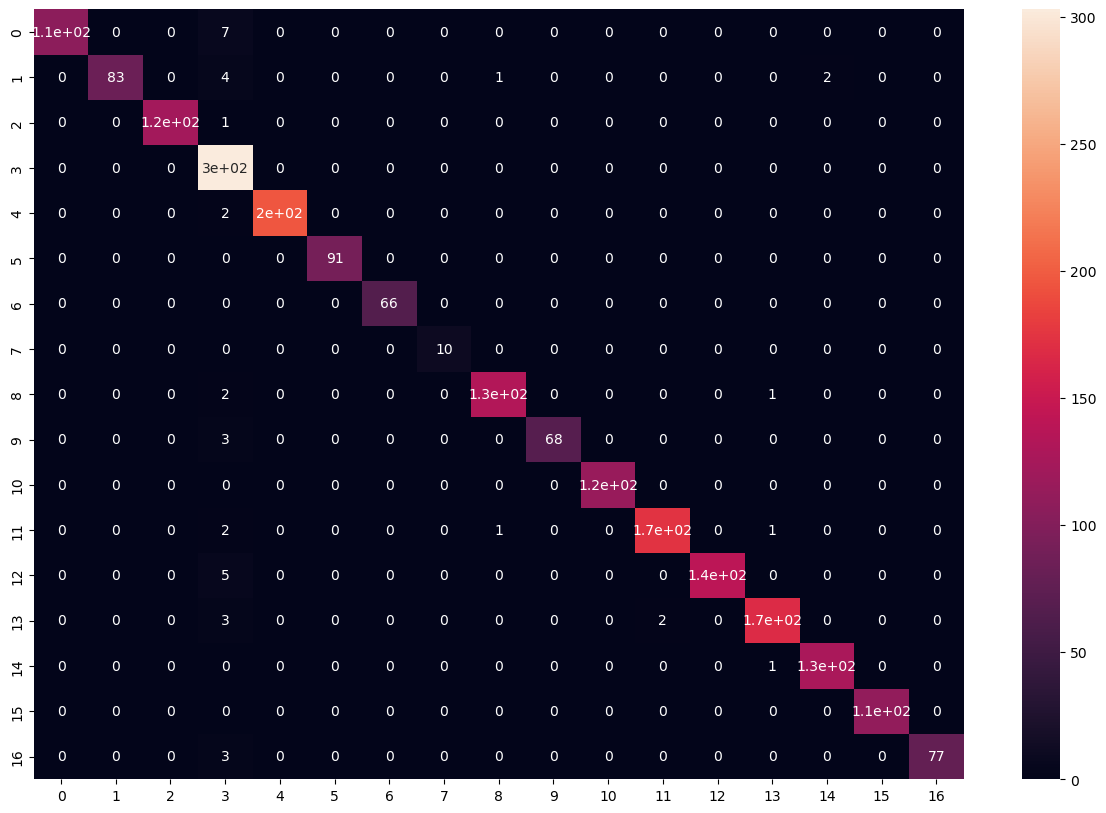

In [17]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

### Model Saving

In [18]:
# saving both cv and model
pickle.dump(cv, open("transform.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))